Import Libraries

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model,Model

Loading the train and test dataset

In [ ]:
train_data_dir = '/Users/macmini202204/Desktop/food dataset/food101/train'
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_data_dir)


Found 75750 files belonging to 101 classes.


In [ ]:
test_data_dir = '/Users/macmini202204/Desktop/food dataset/food101/test'
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_data_dir)

Found 25250 files belonging to 101 classes.


In [ ]:
num_classes = len(train_data.class_names)
print('.... Number of Classes : {0} ....'.format(num_classes))

.... Number of Classes : 101 ....


Data Preparation and Preprocessing

In [ ]:
height = 299
width = 299
channels = 3
batch_size = 32
img_shape = (height, width, channels)
img_size = (height, width)

Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
train_set = datagen.flow_from_directory(
    train_data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training',
    shuffle=True)

val_set = datagen.flow_from_directory(
    train_data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation',
    shuffle=False)

Found 60600 images belonging to 101 classes.
Found 15150 images belonging to 101 classes.


Loading the pre-trained model : InceptionV3

In [ ]:
pre_trained = InceptionV3(weights='imagenet', include_top=False, input_shape=img_shape, pooling='avg')

for layer in pre_trained.layers[:30]:
    layer.trainable = False

Model Optimization

In [ ]:
from tensorflow.keras.regularizers import l2
x = pre_trained.output
x = BatchNormalization()(x)
x = Dropout(0.6)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.4)(x)

In [ ]:
predictions = Dense(num_classes, activation='softmax')(x)

Model Compilation

In [ ]:
model = Model(inputs = pre_trained.input, outputs = predictions)
model.compile(optimizer = Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 22,911,877 (87.40 MB)

 Trainable params: 22,534,981 (85.96 MB)

 Non-trainable params: 376,896 (1.44 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy',  # Monitor validation accuracy
                               patience=5,  # Number of epochs with no improvement before stopping
                               restore_best_weights=True,  # Restore model weights from the best epoch
                               verbose=1)


In [ ]:
history = model.fit(train_set,
                    validation_data = val_set,
                    epochs = 15,
                    verbose=1)

Epoch 1/15


/Users/macmini202204/Library/Python/3.10/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1894/1894 ━━━━━━━━━━━━━━━━━━━━ 7957s 4s/step - accuracy: 0.1727 - loss: 4.5914 - val_accuracy: 0.5776 - val_loss: 1.8020
Epoch 2/15
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 7867s 4s/step - accuracy: 0.4950 - loss: 2.2548 - val_accuracy: 0.6377 - val_loss: 1.5846
Epoch 3/15
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 7800s 4s/step - accuracy: 0.5872 - loss: 1.7975 - val_accuracy: 0.6702 - val_loss: 1.4267
Epoch 4/15
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 7777s 4s/step - accuracy: 0.6401 - loss: 1.5571 - val_accuracy: 0.6675 - val_loss: 1.4393
Epoch 5/15
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 7823s 4s/step - accuracy: 0.6727 - loss: 1.3886 - val_accuracy: 0.6871 - val_loss: 1.3850
Epoch 6/15
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 7723s 4s/step - accuracy: 0.7036 - loss: 1.2477 - val_accuracy: 0.7110 - val_loss: 1.2572
Epoch 7/15
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 7751s 4s/step - accuracy: 0.7306 - loss: 1.1378 - val_accuracy: 0.7098 - val_loss: 1.2725
Epoch 8/15
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 7767s 4s/step - accuracy: 0.7480 - loss: 1.05

Saving the model!

In [ ]:
model.save('food101_15epochs(1).keras')

Loading the test data

In [ ]:
test_data = datagen.flow_from_directory(
    test_data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Found 25250 images belonging to 101 classes.


Model Evaluation on the test(unseen) data

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy}")

/Users/macmini202204/Library/Python/3.10/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


790/790 ━━━━━━━━━━━━━━━━━━━━ 1002s 1s/step - accuracy: 0.7861 - loss: 0.9081
Test Accuracy: 0.7953267097473145


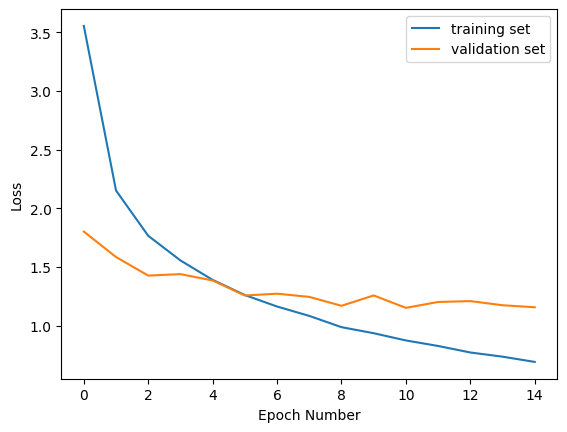

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='validation set')
plt.legend()

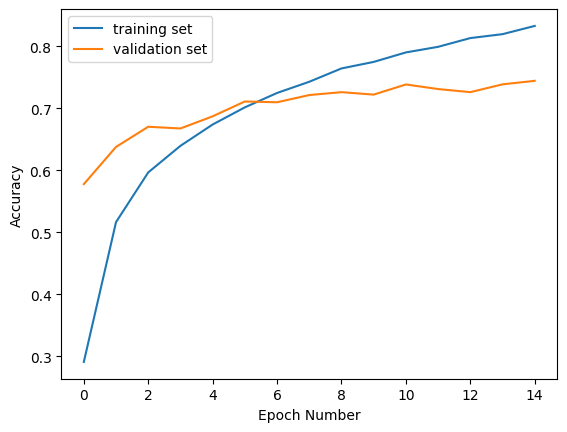

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='validation set')
plt.legend()

In [ ]:
model.save('food101_15epochs(1).keras')

790/790 ━━━━━━━━━━━━━━━━━━━━ 2057s 3s/step


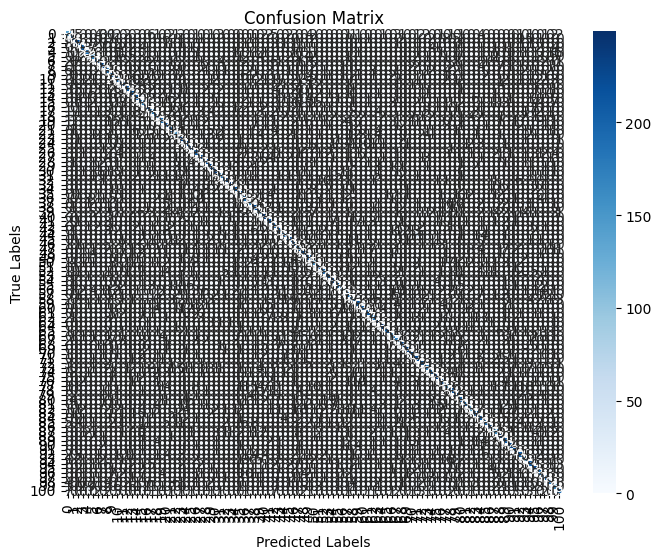

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 2: Get model predictions on the test data
predictions = model.predict(test_data)

# If your model outputs probabilities, convert them to class labels (i.e., highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# Step 3: Extract true labels from the test data
# Assuming `test_data` has a `labels` attribute that contains the true labels
true_labels = test_data.labels  # Modify this line depending on your dataset format

# Step 4: Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Step 5: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(cm.shape[0]), yticklabels=np.arange(cm.shape[0]))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

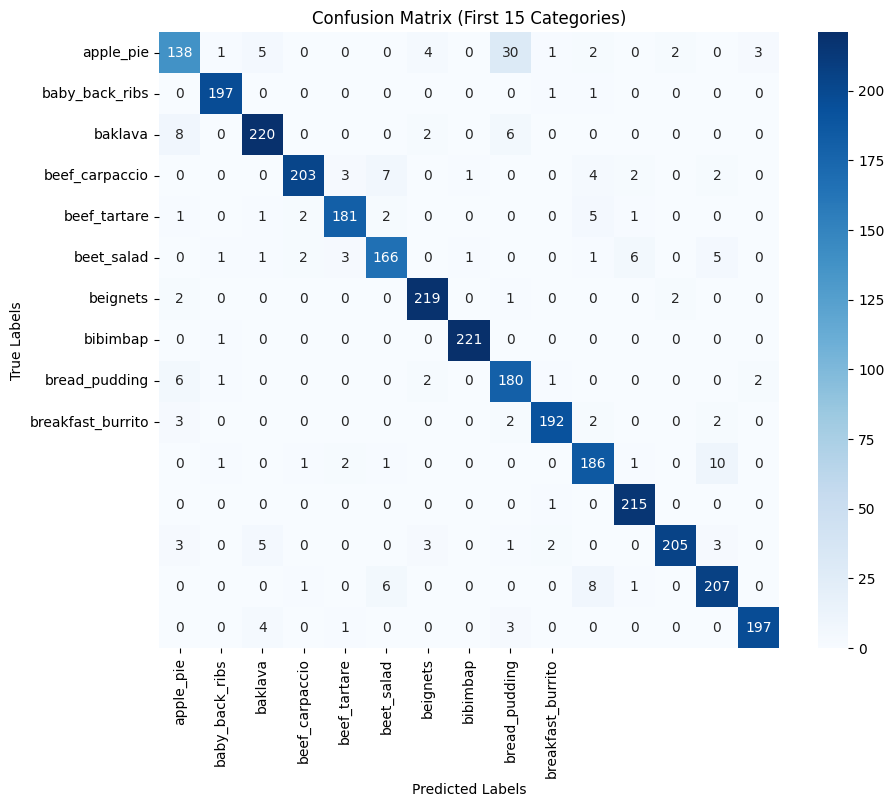

In [ ]:
# Assuming your test data is a generator like ImageDataGenerator
class_names = list(test_data.class_indices.keys())

# Step 5: Slice the confusion matrix to keep only the first 10 categories
cm_15 = cm[:15, :15]  # Get the first 10 rows and columns

# Step 6: Visualize the confusion matrix for the first 10 categories with class names
plt.figure(figsize=(10, 8))
sns.heatmap(cm_15, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names[:10], yticklabels=class_names[:10])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (First 15 Categories)')
plt.show()

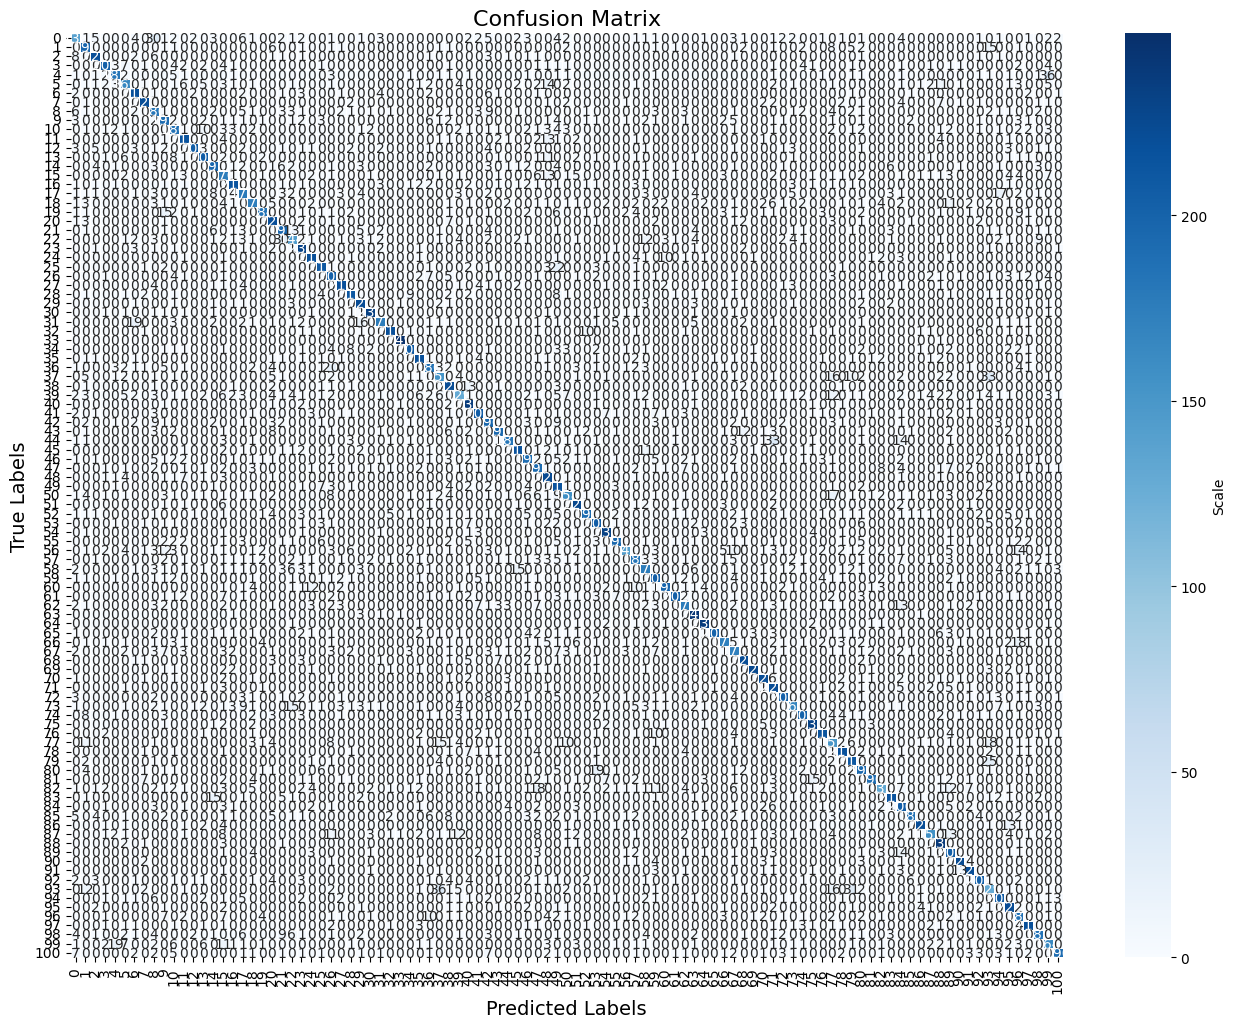

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 4: Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Step 5: Visualize the confusion matrix
plt.figure(figsize=(16, 12))  # Increase the figure size to make the matrix larger

# Create the heatmap with annotations and font size adjustments
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.arange(cm.shape[0]),
            yticklabels=np.arange(cm.shape[0]),
            annot_kws={"size": 10},  # Adjust the size of the annotation text
            cbar_kws={'label': 'Scale'},  # Color bar label
            linewidths=0.5)  # Optional: Adds spacing between cells

# Adjust axis labels to make them readable
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Rotate the labels of the x-axis and y-axis for better visibility
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Step 4: Extract class names from the `class_indices` attribute
class_names = list(test_data.class_indices.keys())

# Step 5: Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print the classification report
print(report)


                         precision    recall  f1-score   support

              apple_pie       0.66      0.55      0.60       250
         baby_back_ribs       0.72      0.79      0.75       250
                baklava       0.86      0.88      0.87       250
         beef_carpaccio       0.88      0.81      0.85       250
           beef_tartare       0.82      0.72      0.77       250
             beet_salad       0.73      0.66      0.70       250
               beignets       0.81      0.88      0.84       250
               bibimbap       0.90      0.88      0.89       250
          bread_pudding       0.59      0.72      0.65       250
      breakfast_burrito       0.68      0.77      0.72       250
             bruschetta       0.71      0.74      0.73       250
           caesar_salad       0.81      0.86      0.83       250
                cannoli       0.95      0.82      0.88       250
          caprese_salad       0.82      0.83      0.83       250
            carrot_cake 